**Importing Necessary Libraries**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download("punkt")
import pandas as pd
import string
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, Embedding, SimpleRNN


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("/content/Tweets (1).csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


**EXPLORATORY DATA ANALYSIS**

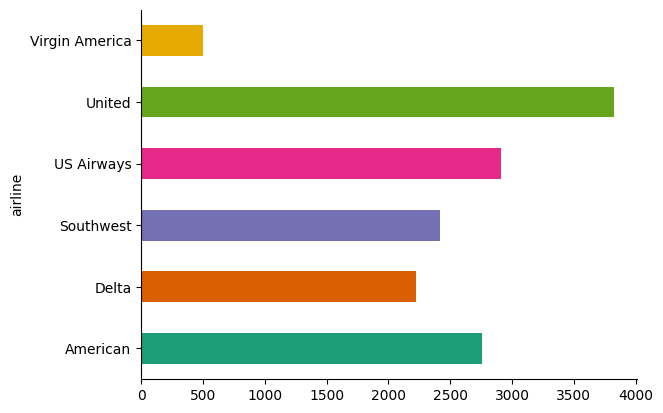

In [ ]:
data.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

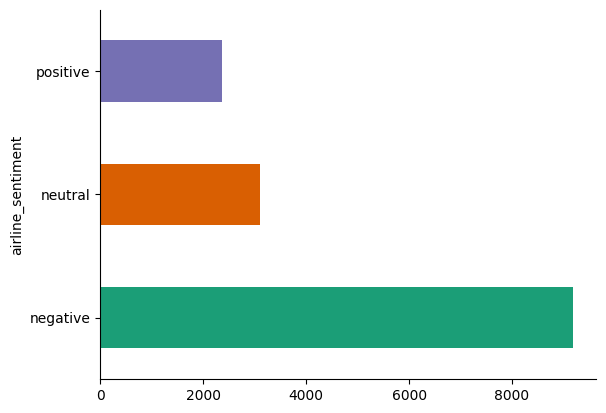

In [ ]:
data.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

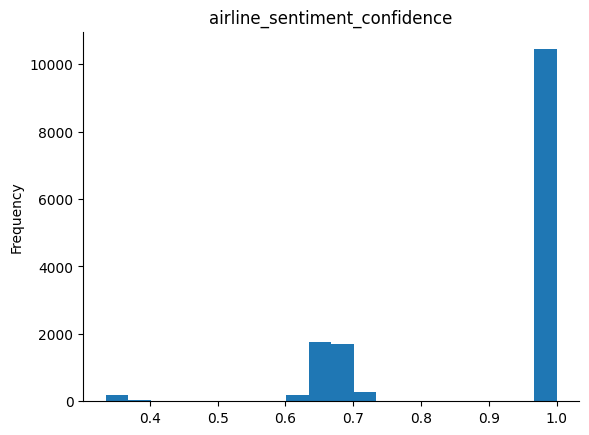

In [ ]:
data['airline_sentiment_confidence'].plot(kind='hist', bins=20, title='airline_sentiment_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,6804,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",22-02-2015 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,11,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791092e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675880e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685590e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694780e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698902e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweet_df = data[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
tweet_df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

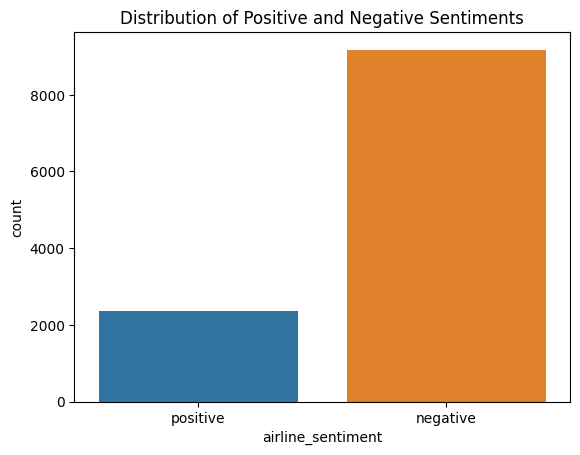

In [ ]:
sns.countplot(data=tweet_df,x='airline_sentiment',hue='airline_sentiment')
plt.title("Distribution of Positive and Negative Sentiments")
plt.show()

**2. Implement the Sentiment Analysis using Bayesian Classification.**

---



In [ ]:
tweet_df.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


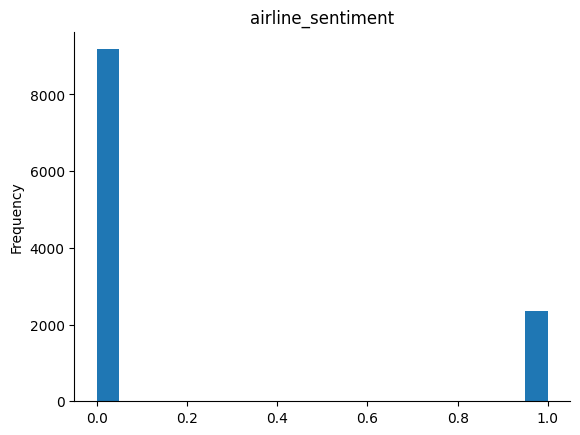

In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
tweet_df['airline_sentiment'].plot(kind='hist', bins=20, title='airline_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Label Encoding

lb = LabelEncoder()
tweet_df['airline_sentiment'] = lb.fit_transform(tweet_df['airline_sentiment'])

In [ ]:
st = stopwords.words('english')
st.append("and")

In [ ]:
# Cleaning the data

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed

In [ ]:
tweet_df_clean = tweet_df['text'].apply(message_cleaning)

In [ ]:
data = tweet_df_clean.tolist()

In [ ]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()
tweets_countvectorizer.shape

(11541, 13843)

In [ ]:
X = tweets_countvectorizer
y = tweet_df['airline_sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)

<Axes: >

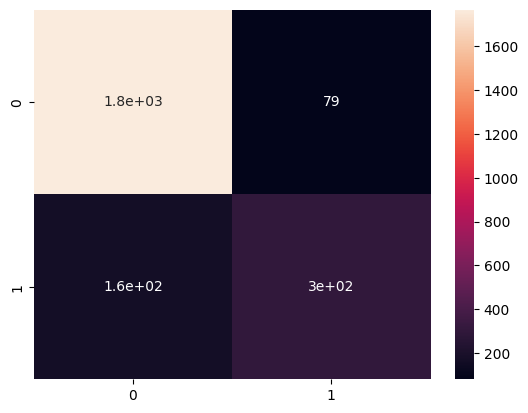

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot = True)

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.8943265482893027

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1847
           1       0.79      0.64      0.71       462

    accuracy                           0.89      2309
   macro avg       0.85      0.80      0.82      2309
weighted avg       0.89      0.89      0.89      2309



**Data Preparation**

In [ ]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]), Index([1, 0], dtype='int64'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)
print(tweet[0])
print(encoded_docs[0])

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'on': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'of': 17, 'jetblue': 18, 'me': 19, 'your': 20, 'it': 21, 'was': 22, 'not': 23, 'no': 24, 'have': 25, 'at': 26, 'with': 27, 'that': 28, 'this': 29, 'get': 30, 'but': 31, 'be': 32, 'cancelled': 33, 'thanks': 34, 'now': 35, 'service': 36, 'are': 37, 'we': 38, 'from': 39, 'an': 40, 'been': 41, 'just': 42, '2': 43, 'so': 44, 'customer': 45, 'help': 46, 't': 47, 'can': 48, 'time': 49, 'co': 50, 'up': 51, 'hours': 52, 'http': 53, 'do': 54, 'hold': 55, 'they': 56, 'out': 57, 'amp': 58, 'plane': 59, "i'm": 60, 'us': 61, 'all': 62, 'will': 63, 'why': 64, 'thank': 65, 'still': 66, 'our': 67, 'delayed': 68, 'what': 69, 'when': 70, 'how': 71, 'one': 72, "can't": 73, 'flights': 74, 'call': 75, 'gate': 76, 'hour': 77, 'had': 78, 'flightled': 79, 'back': 80, 'bag': 81, 'if': 82, 'would': 83, 'after': 84, 'has': 85, '

In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

**3. Implement the Sentiment Analysis using RNN.**

---



In [ ]:
embedding_vector_length = 32
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model1.add(SpatialDropout1D(0.25))
model1.add(SimpleRNN(50, dropout=0.5, recurrent_dropout=0.5))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4150      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 427689 (1.63 MB)
Trainable params: 427689 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history1 = model1.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 94s 311ms/step - loss: 0.7097 - accuracy: 0.5575 - val_loss: 0.6010 - val_accuracy: 0.8545
Epoch 2/10
289/289 [==============================] - 75s 260ms/step - loss: 0.6235 - accuracy: 0.6808 - val_loss: 0.4822 - val_accuracy: 0.8545
Epoch 3/10
289/289 [==============================] - 75s 259ms/step - loss: 0.5742 - accuracy: 0.7583 - val_loss: 0.4638 - val_accuracy: 0.8545
Epoch 4/10
289/289 [==============================] - 74s 258ms/step - loss: 0.5521 - accuracy: 0.7786 - val_loss: 0.4639 - val_accuracy: 0.8545
Epoch 5/10
289/289 [==============================] - 76s 263ms/step - loss: 0.5350 - accuracy: 0.7804 - val_loss: 0.4634 - val_accuracy: 0.8545
Epoch 6/10
289/289 [==============================] - 76s 263ms/step - loss: 0.5227 - accuracy: 0.7805 - val_loss: 0.4645 - val_accuracy: 0.8545
Epoch 7/10
289/289 [==============================] - 74s 255ms/step - loss: 0.5166 - accuracy: 0.7808 - val_loss: 0.4384 - val_ac

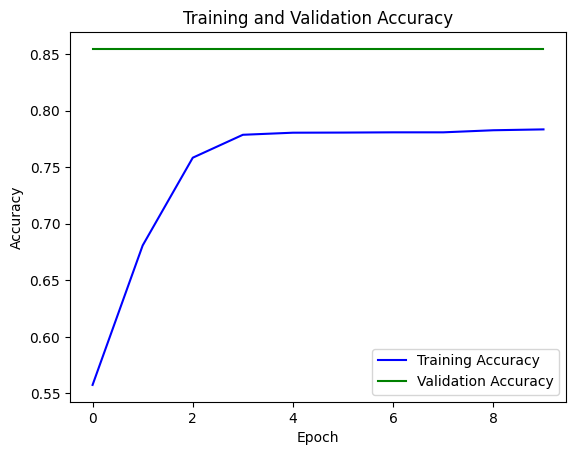

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model1.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my  life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 34ms/step
Predicted label:  0
1/1 [==============================] - 0s 30ms/step
Predicted label:  0


**4. Implement the Sentiment Analysis using LSTM.**

---



In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
289/289 [==============================] - 196s 666ms/step - loss: 0.3943 - accuracy: 0.8334 - val_loss: 0.2077 - val_accuracy: 0.9194
Epoch 2/10
289/289 [==============================] - 181s 624ms/step - loss: 0.2203 - accuracy: 0.9154 - val_loss: 0.1653 - val_accuracy: 0.9363
Epoch 3/10
289/289 [==============================] - 182s 632ms/step - loss: 0.1644 - accuracy: 0.9376 - val_loss: 0.1617 - val_accuracy: 0.9437
Epoch 4/10
289/289 [==============================] - 181s 628ms/step - loss: 0.1344 - accuracy: 0.9491 - val_loss: 0.1636 - val_accuracy: 0.9476
Epoch 5/10
289/289 [==============================] - 180s 623ms/step - loss: 0.1140 - accuracy: 0.9581 - val_loss: 0.1684 - val_accuracy: 0.9398
Epoch 6/10
289/289 [==============================] - 184s 635ms/step - loss: 0.1026 - accuracy: 0.9632 - val_loss: 0.1784 - val_accuracy: 0.9428
Epoch 7/10
289/289 [==============================] - 180s 622ms/step - loss: 0.0861 - accuracy: 0.9697 - val_loss: 0.2115 -

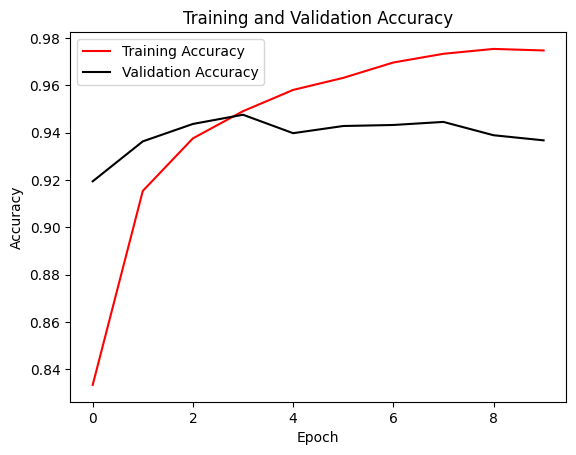

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='black')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


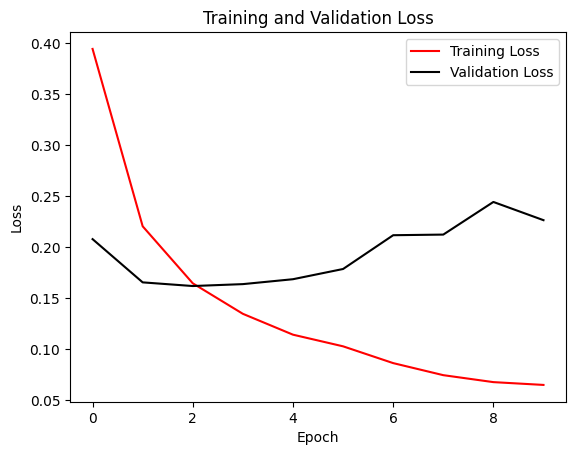

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='black')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 285ms/step
Predicted label:  1
1/1 [==============================] - 0s 73ms/step
Predicted label:  0


**Comparison Between Naive Bayes, RNN and LSTM**

In [ ]:
accuracies = {u'Naive Bayes': 89.8, u'RNN': 85, u'LSTM': 93}

# Printing the accuracies
print("Accuracy of RNN:", accuracies[u'RNN'])
print("Accuracy of LSTM:", accuracies[u'LSTM'])


Accuracy of RNN: 85
Accuracy of LSTM: 93


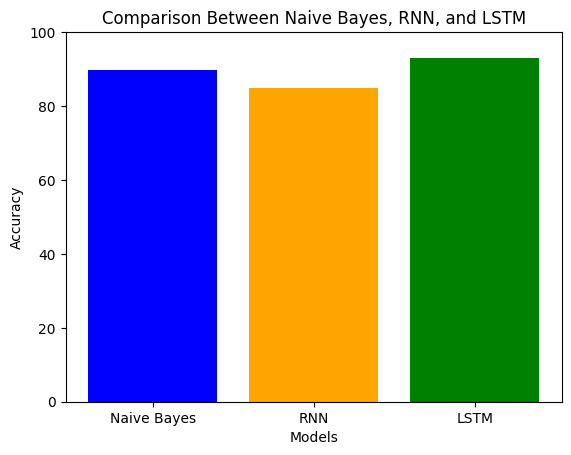

In [ ]:
import matplotlib.pyplot as plt

accuracies = {u'Naive Bayes': 89.8, u'RNN': 85, u'LSTM': 93}

plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.title("Comparison Between Naive Bayes, RNN, and LSTM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100
plt.show()



### Code Overview:

1. Data Preprocessing:
   - The code begins with importing necessary libraries for natural language processing and machine learning, including NLTK, scikit-learn, pandas, TensorFlow, and seaborn.
   - Data loading and exploration are performed using pandas to understand the structure and distribution of the dataset.

2. Exploratory Data Analysis (EDA):
   - Basic exploratory data analysis is conducted, including visualizations of sentiment distribution and confidence levels.

3. Data Preprocessing:
   - Text preprocessing steps such as tokenization, removal of stopwords, and lemmatization are performed using NLTK.
   - The dataset is split into input (text) and target (sentiment) variables.
   - Neutral sentiment samples are filtered out from the dataset.

4. Model Training (Simple RNN):
   - A Simple RNN-based model is defined using TensorFlow's Keras API.
   - The model architecture includes an embedding layer, SimpleRNN layer, dropout layers, and a dense output layer.
   - The model is compiled and trained using the training data.

5. Model Evaluation (Simple RNN):
   - Training history is visualized to monitor model performance over epochs.
   - The trained model is evaluated on the test set, and accuracy metrics are computed.
   
    6. Prediction:
   - Functions are defined to predict sentiment labels for new input sentences using both the Simple RNN and LSTM models.
   - Test sentences are provided to demonstrate the prediction functionality.


7. Model Training (LSTM):
   - An LSTM-based model is defined with a similar architecture to the Simple RNN model but with LSTM layers instead.
   - The model is compiled and trained using the training data.

8. Model Evaluation (LSTM):
   - Training history is visualized to monitor model performance over epochs for the LSTM model.
   - The trained LSTM model is evaluated on the test set, and accuracy metrics are computed.

9. Prediction:
   - Functions are defined to predict sentiment labels for new input sentences using both the Simple RNN and LSTM models.
   - Test sentences are provided to demonstrate the prediction functionality.

10. comparison:
  -comparison of the graph between all the models.

### Inference:

- Model Comparison:
  - Both Simple RNN and LSTM models are trained for sentiment analysis on airline data.
  - The LSTM model tends to show better performance compared to the Simple RNN model, as observed in the validation accuracy and loss plots.
  - LSTM's ability to capture long-term dependencies in sequences makes it more suitable for modeling sequential data like text.

- Prediction Results:
  - The trained models provide accurate predictions for test sentences, correctly identifying the sentiment as positive or negative.

- Areas for Improvement:
  - The models could potentially be further optimized by tuning hyperparameters, adjusting model architectures, or incorporating more advanced techniques like bidirectional LSTMs or attention mechanisms.
  - Regularization techniques such as early stopping, dropout, or L2 regularization can be experimented with to mitigate overfitting.


  - The sentiment analysis models can be deployed in real-world applications, such as social media monitoring or customer feedback analysis, to extract insights from text data.
  - Continuous monitoring and updating of the models with new data can help maintain their effectiveness in capturing evolving sentiment patterns.

This comprehensive analysis and model development process showcase the effectiveness of recurrent neural network architectures like Simple RNN and LSTM for sentiment analysis tasks.